In [1]:
%pylab

Using matplotlib backend: <object object at 0x7f05600dda10>
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
noise = np.random.normal(0,1,100)

In [5]:
t = np.arange(100)

In [9]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

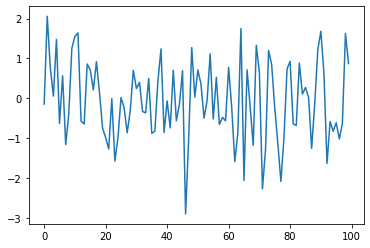

In [6]:
plt.plot(t,noise)

In [10]:
gw = 5 * np.sin(2*np.pi/10*t)

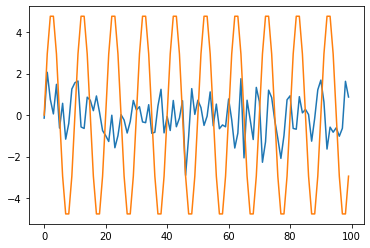

In [11]:
plt.plot(t,noise)
plt.plot(t,gw)

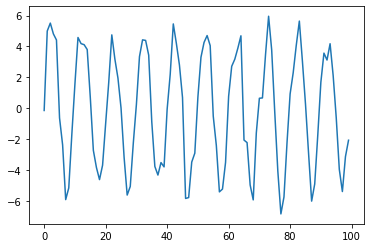

In [12]:
plt.plot(t,noise+gw)

# d = noise + gw = n+h

# likelihood = $\mathcal{L} = \prod_i \frac{1}{\sqrt{2\pi}}\exp\left( -(d_i-h_i)^2/2\right)$

$\ln \mathcal{L} \propto \sum_i -(d_i-h_i)^2 / 2$

$\ln \mathcal{L} \propto \sum_i -d_i^2/2$

ranking statistic = $\ln \mathcal{L}_1 - \ln \mathcal{L}_2 = \sum_i d_ih_i - h_i^2/2$

In [19]:
def ranking(d,h):
    result = d*h - h*h/2
    return np.sum(result)

In [20]:
h1 = 3 * np.sin(2*np.pi/20*t)

In [29]:
h2 = 10* np.sin(2*np.pi/100*t)

In [31]:
h3 = 4.9 * np.sin(2*np.pi/10*t)

In [42]:
h4 = 5*np.sin(2*np.pi/9.9*t)

In [43]:
h5 = 5*np.sin(2*np.pi/8*t)

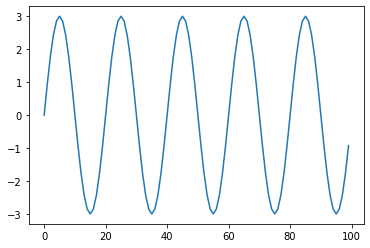

In [21]:
plt.plot(t,h1)

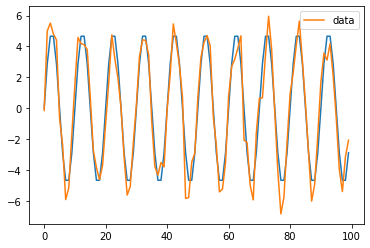

In [38]:
plt.plot(t,h3)
plt.plot(t,noise+gw,label='data')
plt.legend()

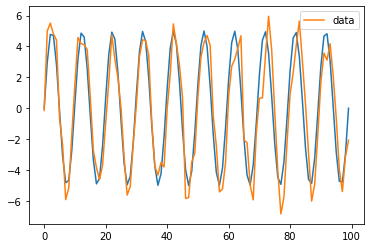

In [39]:
plt.plot(t,h4)
plt.plot(t,noise+gw,label='data')
plt.legend()

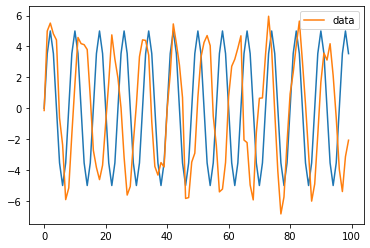

In [44]:
plt.plot(t,h5)
plt.plot(t,noise+gw,label='data')
plt.legend()

In [45]:
ranking(noise+gw,h5)

-534.3049061528121

In [26]:
h_true = 5 * np.sin(2*np.pi/10*t)

In [27]:
ranking(noise+gw,h1)

-229.75171513390103

In [30]:
ranking(noise+gw,h2)

-2473.443226126925

In [32]:
ranking(noise+gw,h3)

629.5538503441323

In [34]:
ranking(noise+gw,h4)

573.0508442204508

In [28]:
ranking(noise+gw,h_true)

629.9018881062575

# 

$h = 5 \times \sin (\frac{2\pi}{10} t)$

# 

$\mathcal{N}(0,1) = \frac{1}{\sqrt{2\pi}} \exp \left({-t^2}/2\right)$

# d = noise + gw = n+h

# likelihood = $\mathcal{L} = \prod_i \frac{1}{\sqrt{2\pi}}\exp\left( -(d_i-h_i)^2/2\right)$

$\ln \mathcal{L} \propto \sum_i -(d_i-h_i)^2 / 2$

$\ln \mathcal{L} \propto \sum_i -d_i^2/2$

ranking statistic = $\ln \mathcal{L}_1 - \ln \mathcal{L}_2 = \sum_i d_ih_i - h_i^2/2$

In [52]:
background = []
for i in range(100000):
    noise_simulation = np.random.normal(0,1,100)
    ranking_now = ranking(noise_simulation,h_true)
    background.append(ranking_now)

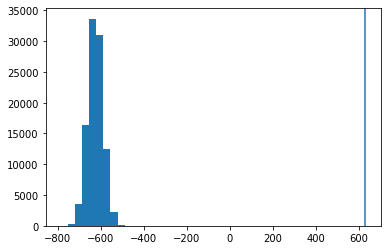

In [53]:
plt.hist(background)
plt.axvline(ranking(noise+gw,h_true))

# 对于一个比较差的模板，我们是否也可以找到引力波？

In [55]:
background_h5 = []
for i in range(100000):
    noise_simulation = np.random.normal(0,1,100)
    ranking_now = ranking(noise_simulation,h5)
    background_h5.append(ranking_now)

In [57]:
data = gw+noise

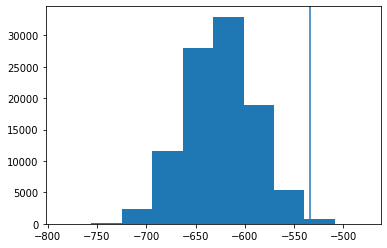

In [58]:
plt.hist(background_h5)
plt.axvline(ranking(data,h5))

In [62]:
len(np.where(background_h5>ranking(data,h5))[0])

474

In [63]:
474/100000

0.00474